In [ ]:
#link dataset: https://www.kaggle.com/radmirzosimov/telecom-users-dataset
#References:
##1.https://www.kaggle.com/gcmadhan/ensemble-techniques-80-accuracy
##2.https://www.kaggle.com/guptakush/telecommunication-data-analysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('E:/E_Linh tinh/Ngành Viễn thông/Data/Data_telecom_users/data pratice_telecom_users.csv')

# 1. Understanding the Data

In [6]:
#check number of row
data.shape[0]

5986

In [7]:
#Check 5 first columns
data.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [8]:
#Check 5 last columns
data.tail()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,3772,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5982,5191,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5983,5226,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5984,5390,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes
5985,860,4795-UXVCJ,Male,0,No,No,26,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.80,457.3,No


In [10]:
#Check number of column, row
data.shape

(5986, 22)

In [16]:
###### check infor data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [15]:
#check data type: Many of the data types are objects. 
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###### Feature details
• Churn column: Customers who left within the last month
• Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
• Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
• Demographic info about customers – gender, age range, and if they have partners and dependents

In [17]:
#We see that variable TotalCharges is object type but it should be float type,so lets convert it
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')

In [18]:
#check data type again to see whether the type of column TotalCharges changed or not? => It worked.
data.dtypes

Unnamed: 0            int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
#Check name of all columns (22 columns)
data.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## Finding unique values

In [20]:
#Count the unique value for all columns in the table
data.nunique() 

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5610
Churn                  2
dtype: int64

In [25]:
# lets check the nb. of unique items present in the categorical column
data.select_dtypes('object').nunique()

customerID          5986
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [24]:
# lets check the nb. of unique items present in the numerical column
data.select_dtypes(np.number).nunique()

Unnamed: 0        5986
SeniorCitizen        2
tenure              73
MonthlyCharges    1526
TotalCharges      5610
dtype: int64

In [26]:
# lets check the percentage of missing data in each columns present in the data
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

Unnamed: 0          0.000000
customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001671
Churn               0.000000
dtype: float64


there is no mising data in this database

In [28]:
#check the unique value in one column
data['TechSupport'].unique() 

array(['No internet service', 'No', 'Yes'], dtype=object)

## Describing the data into numbers

In [29]:
#Basic descriptive data analysis: number of values, mean, std, min, max, quartiles
data.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5976.000000
mean,3533.561310,0.161377,32.468760,64.802213,2298.060617
std,2035.705666,0.367909,24.516391,30.114702,2274.127165
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1777.250000,0.000000,9.000000,35.650000,404.312500
50%,3546.500000,0.000000,29.000000,70.400000,1412.150000
75%,5291.750000,0.000000,56.000000,89.900000,3846.962500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


It shows that 4 columns are of type numbers

In [30]:
#describe for object data: count, unique values, top, frequency
data.describe(include=[np.object])

<ipython-input-30-f7ffe5ed3165>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data.describe(include=[np.object])


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,5986,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,3318-OSATS,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


# 2. Cleaning the Database


In [61]:
#check null values
data.isnull().sum() 

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

Column TotalCharges has 10 null columns. We will set it equal to 0

In [57]:
#remove the redundant columns (Xóa những cột không cần thiết). Có thể thay axis='columns' thành axis=1
telecom = data.drop(['customerID','Unnamed: 0'], axis='columns')

In [60]:
#check data after removing columns Unnamed. It worked.
telecom.head() 

AttributeError: 'NoneType' object has no attribute 'head'

# 3.Describing the data into numbers and making chart

## 3.1.Check by only one feature

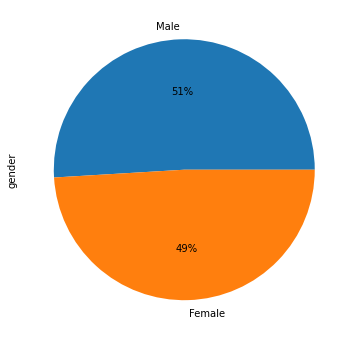

In [38]:
#Check only one chart by 1 column:
#Pie Chart
gender=data["gender"].value_counts()
plt.figure(figsize=(8,6)) #increase size
plot=gender.plot.pie(autopct="%1.0f%%")
plt.show()

Data shows that 51 % are males and 49% users are females

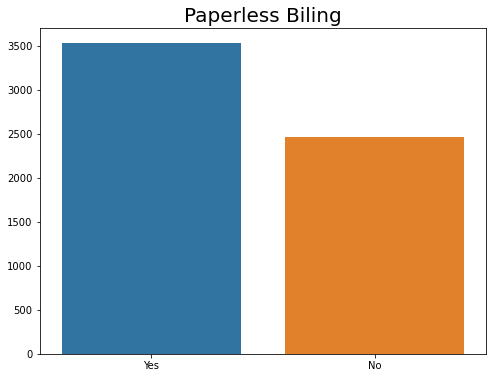

In [80]:
#Check only one chart by 1 column:
#Column Chart
billing=data['PaperlessBilling'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=billing.index,y=billing.values)
plt.title('Paperless Biling',size=20) #add title: không bắt buộc
plt.show()

D:\Program\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

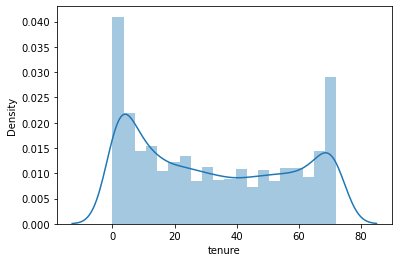

In [87]:
#Check only one chart by 1 column:
#Histogram Chart to see distribution
sns.distplot(data['tenure'], bins=20) #(có thể bỏ hoặc điều chỉnh bins - số lượng cột)

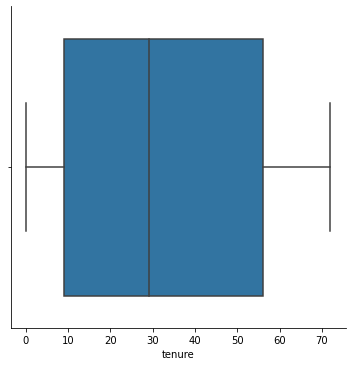

In [88]:
#Using Plot chart to check the distribution of variable. For example: tenure in this case
#To check outlier is the points that are not in the quatitles
sns.catplot(x = 'tenure', kind = 'box', data = data)

## 3.2. Univariate Analysis (Phân tích đơn biến)

###### Contineous Features

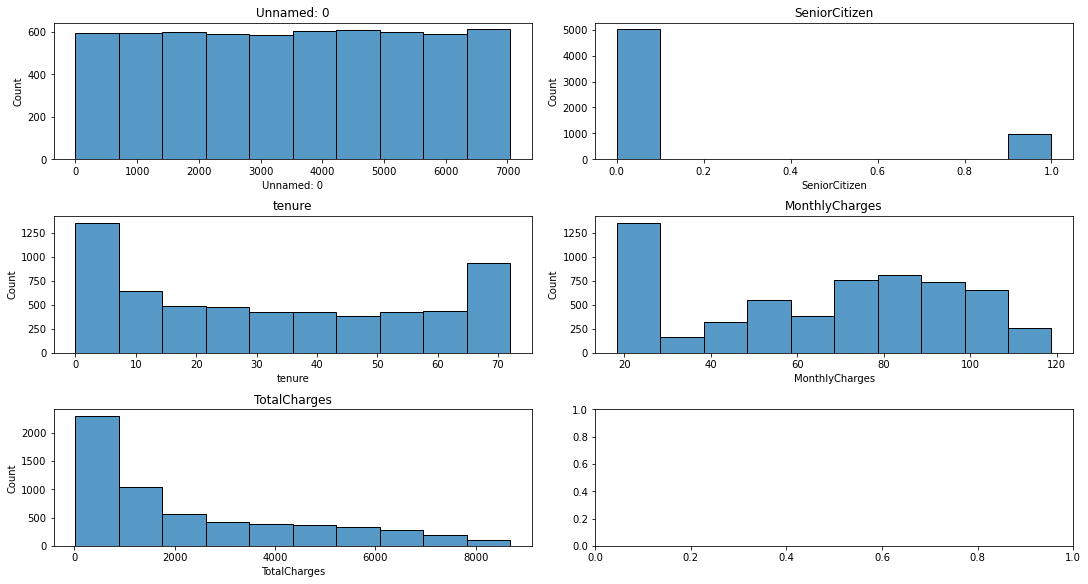

In [46]:
int_feat = data.select_dtypes(exclude=['object','category']).columns
fig, ax = plt.subplots(nrows=3, ncols = 2, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for c,i in enumerate(int_feat):
    sns.histplot(data[i], ax=ax[c], bins=10)
    ax[c].set_title(i)

Observations:
1.Senior Citizen has only 2 values is 0 or 1. most customers are note senior citizen
2.Tenure is ranging between 1 to 70 year. most prefered tenure are less than 10 and over 70 years.
3.Monthly charges raning between 20 to 120. most customers are in 20-30 range
4.Total Charges - most customers total charges are between 5000

###### Categorical Features

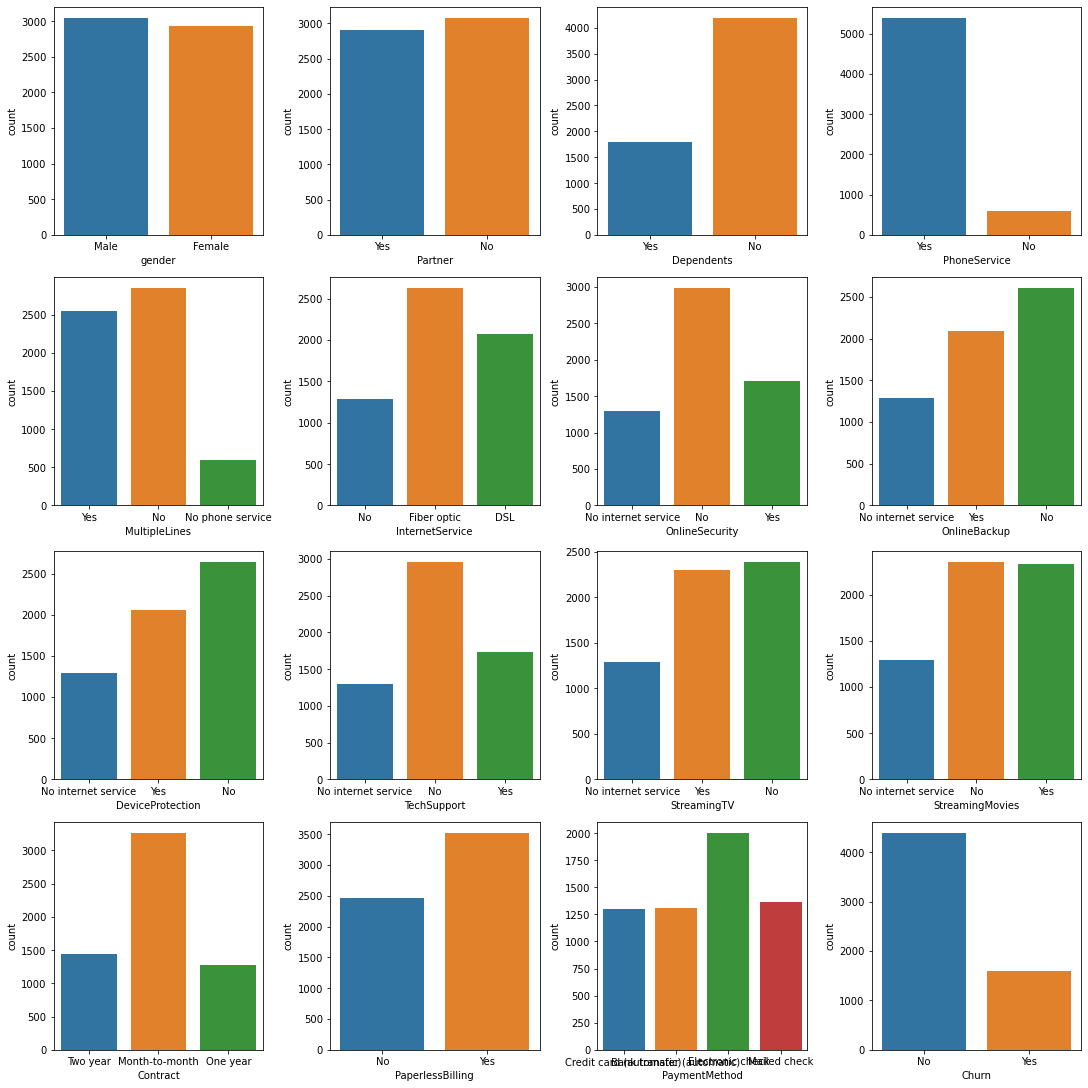

In [63]:
cat_cols = data.select_dtypes(include=['object','category']).columns
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
for x,i in enumerate(cat_cols):
    sns.countplot(x=data[i], ax=ax[x])

Observations:
1. Genere: There is no much difference in Genere base customer. very few count differences.
2. Partner: Feature contains more or less same size of counts.
3. Dependent: Mostly clients are independent
4. Phone services: the nb of people uses phone is more than 5000. Conclusion made from here is there are every customers using mobile phones
5. Clients streaming TV: 2400 clients  do not stream TV ,2300 clients stream TV and 1100 do not have internet service
6. Clients streaming Movies: About 2350 clients do not watch movies and about 2300 clients watch movies and 1300 clients  do not have internet
7. Contract: Almost people use services on monthly basis (>3000) and relatively less clients use on one and two year basis
8. PaperlessBilling: It is clear that maximum clients use paperless billing methor and are eco-friendly
9. Payment Methodd: Most of the clients prefers to pay by electronic check
10. Churn: Athough 'yes' is lower than 'no' but this churn rate is very high. the company needs to find out why to hold customers.

## 3.3. Bivariated Analysis (Phân tích 2 biến)

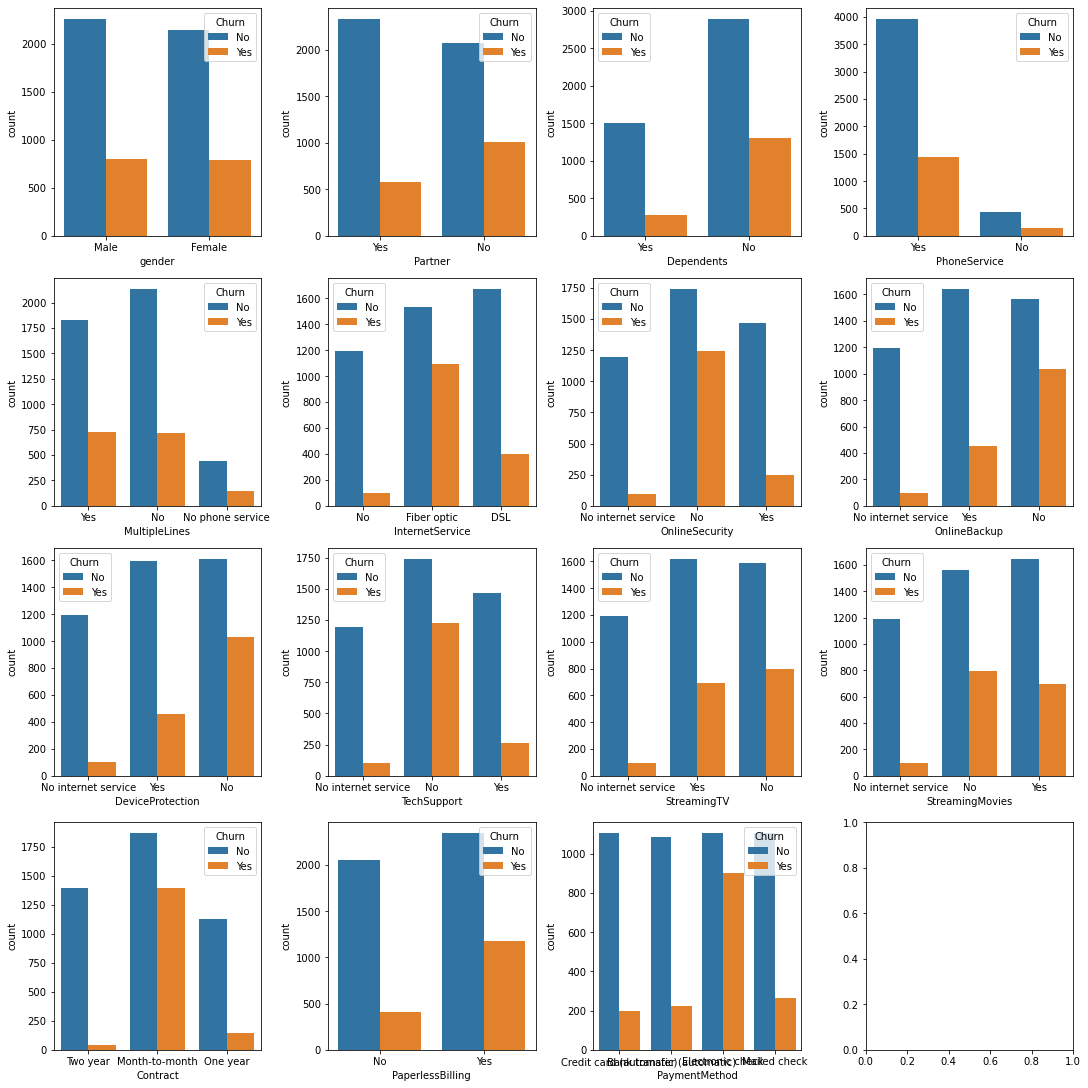

In [79]:
# Churn is the Target variable, let us to the analysis with the Target variable
#Adding hue = Churn to check the customer left service
cat_cols = data.select_dtypes(include=['object','category']).columns.to_list()
cat_cols.remove('Churn')
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
for x,i in enumerate(cat_cols):
    sns.countplot(x=data[i], ax=ax[x], hue=data['Churn'])

The sample differnce in Churn and non churn for the categorical features have no much difference appart from the imbalance in the dataset

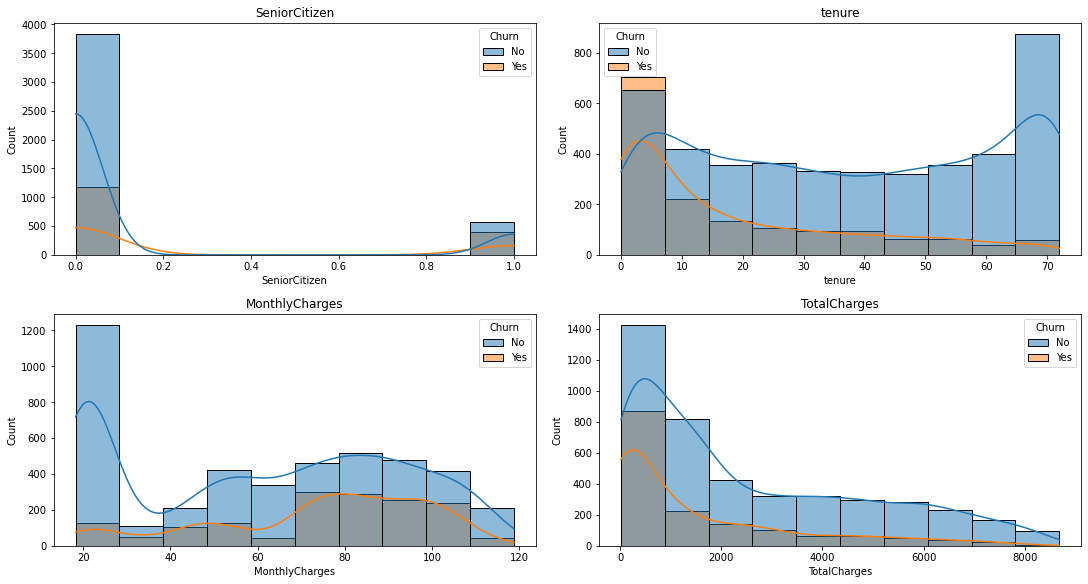

In [98]:
# Churn is the Target variable, let us to the analysis with the Target variable
#histogram
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for c,i in enumerate(int_feat):
    sns.histplot(data=data, x=i, ax=ax[c], bins=10, hue='Churn', kde=True)
    ax[c].set_title(i)

Observations:
1. SeniorCitizen: almost customers are not senior citizen so it has churn rate more than senior citizen. 
2. Tenure has opposite effect on Churn "Yes" or "No". Churn customers have minimum tenure, where in no churn customers prefer longer tenure
3. Monthly Charges & Total charges have no visible difference apart from the imbalance in the data.

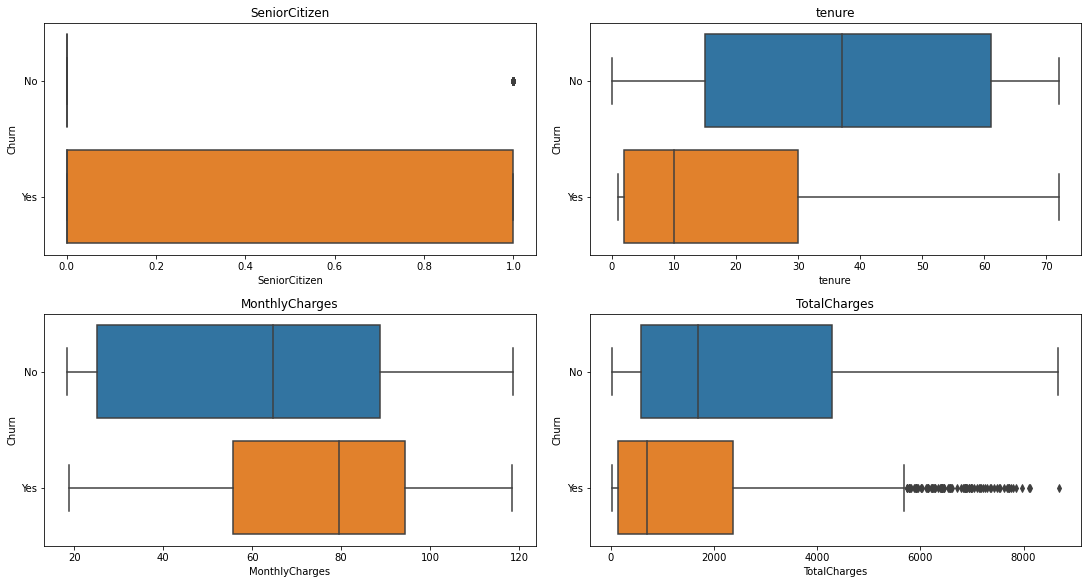

In [99]:
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for c,i in enumerate(int_feat):
    sns.boxplot(data=data, x=i, ax=ax[c], y='Churn')
    ax[c].set_title(i)

there are no much ourliers. In TotalCharges, it's mostly in yes churn

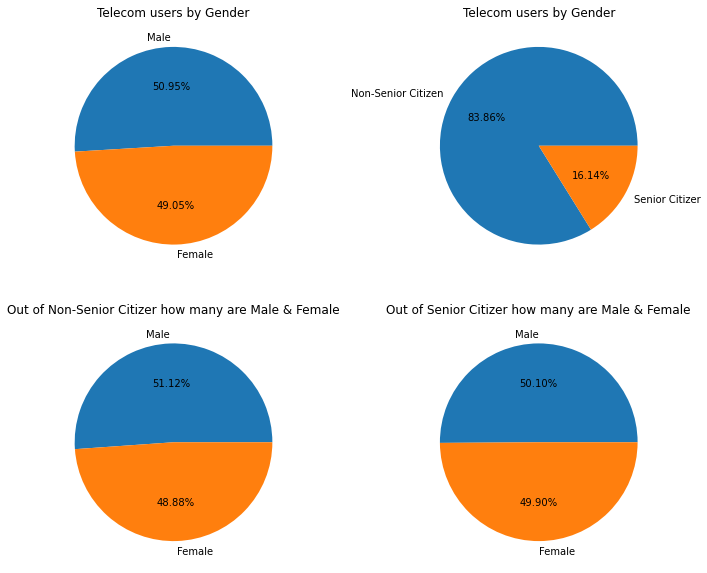

In [101]:
#pie chare
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
ax[0,0].pie(data['gender'].value_counts(), autopct='%.2f%%', labels=data['gender'].unique())
ax[0,0].set_title('Telecom users by Gender')
ax[0,1].pie(data['SeniorCitizen'].value_counts(), autopct='%.2f%%', labels=['Non-Senior Citizen','Senior Citizer'])
ax[0,1].set_title('Telecom users by Gender')
ax[1,1].pie(data[data['SeniorCitizen']==1]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'])
ax[1,1].set_title('Out of Senior Citizer how many are Male & Female')
ax[1,0].pie(data[data['SeniorCitizen']==0]['gender'].value_counts(), autopct='%.2f%%', labels=['Male','Female'])
ax[1,0].set_title('Out of Non-Senior Citizer how many are Male & Female')
plt.show()

# 4. Relationship Analysis

## Calculating the corelation matrix

In [64]:
corr = data.corr()

<AxesSubplot:>

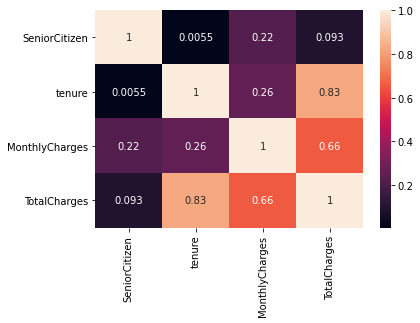

In [67]:
#View the correlation table between variables
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True)

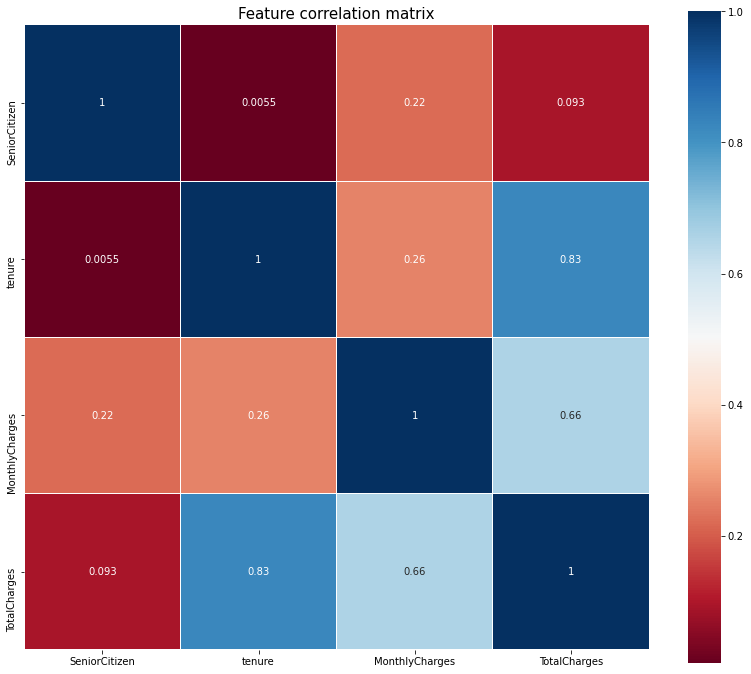

In [69]:
#making larger table
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12)) #set size for table
plt.title('Feature correlation matrix', y=1, size=15)#set size for title
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

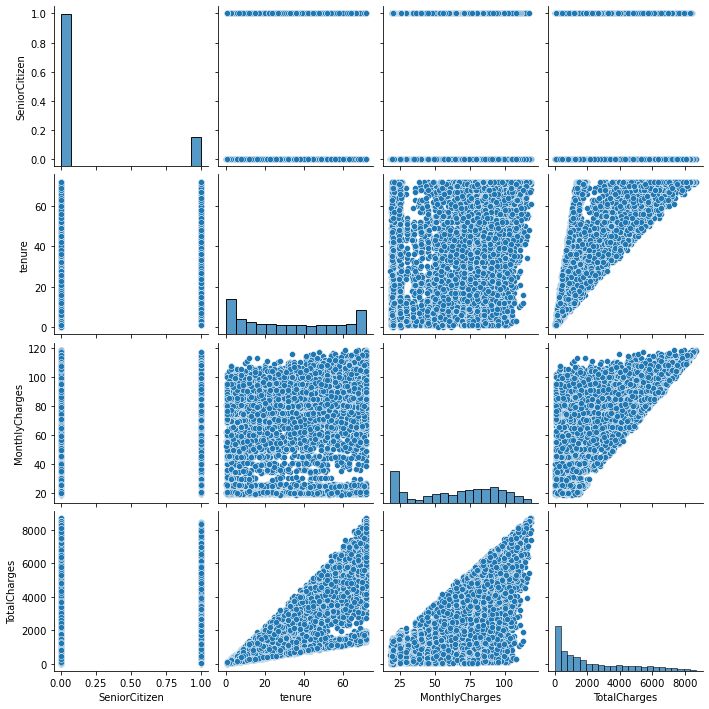

In [72]:
#View the correlation charts between variables
sns.pairplot(data)

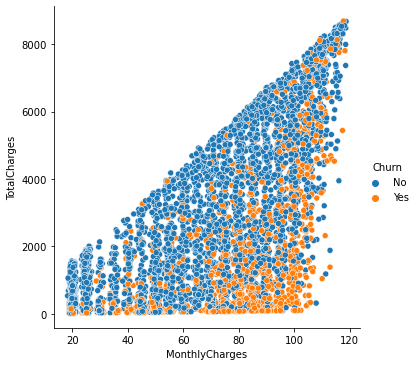

In [73]:
#Using scatter plot to check relationship between 2 variables and use the hue (màu sắc)
sns.relplot(x= 'MonthlyCharges', y= 'TotalCharges', hue= 'Churn', data = data)

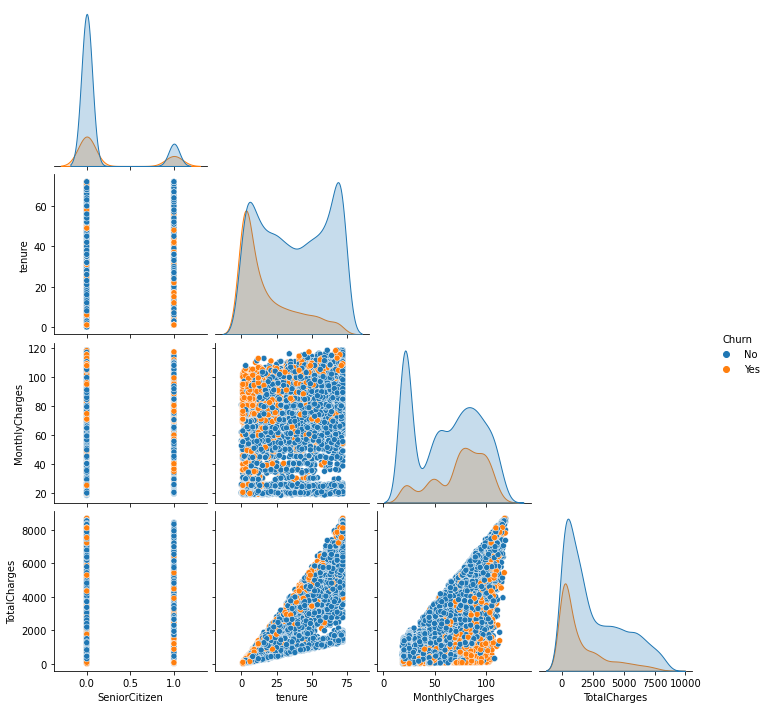

In [75]:
#View the correlation charts between variables with hue = churn
sns.pairplot(data,hue='Churn', corner=True )